### 0. Setting

In [1]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import random

### 1. Augmentation

In [2]:
# 보라색 원이 포함된 augmentation된 이미지들의 경로 설정
image_folder = 'output_folder/*.jpg'
image_paths = glob.glob(image_folder)

### 2. Image Preprocessing

In [11]:
# 1. 이미지를 흑백으로 전환
def convert_to_grayscale(image):
    img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # 확인용 : 흑백 이미지 출력
    print("1단계 : 흑백 변환")
    cv.imshow('Grayscale Image', img_gray)

    return img_gray

In [17]:
# 2. 흑백 이미지에서 보라색 원으로 탐지된 부분의 명도 추출
def extract_brightness(image):
    img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # 보라색 범위로 mask 생성 (기존에 구했던 purple HSV 값 사용)
    lower_purple = np.array([125, 50, 50])
    upper_purple = np.array([150, 255, 255])
    purple_mask = cv.inRange(img_hsv, lower_purple, upper_purple)

    # 확인용 : 보라색 mask img 출력
    print("2-1단계 : 보라색 mask")
    cv.imshow('Purple Mask', purple_mask)

    # 흑백 전환 후, 마스크가 적용된 부분의 명도 값만 추출
    img_gray = convert_to_grayscale(image)
    brightness_values = img_gray[purple_mask > 0]

    # mask 적용된 흑백 img 출력
    img_masked_brightness = np.zeros_like(img_gray)
    img_masked_brightness[purple_mask > 0] = img_gray[purple_mask > 0]

    print("2-2단계 : 보라색 영역의 명도 값")
    cv.imshow('Purple Brightness', img_masked_brightness)

    return brightness_values

### 3. Brightness range

In [18]:
# 3. 각 이미지에서 명도 값 추출 후 공통 명도 범위 계산
def calculate_common_brightness_range(image_paths):
    all_brightness_values = []

    for image_path in image_paths:
        img = cv.imread(image_path)
        brightness_values = extract_brightness(img)
        all_brightness_values.extend(brightness_values)  # 모든 이미지에서 명도 값을 합침

    # 공통 명도 범위 (일반적으로 최댓값과 최솟값으로 범위 설정)
    min_brightness = np.min(all_brightness_values)
    max_brightness = np.max(all_brightness_values)
    common_brightness_range = (min_brightness, max_brightness)

    print(f"3단계-공통 명도 범위 : {common_brightness_range}")

    return common_brightness_range

### 4. Brightness to HSV

In [19]:
# 4. 명도를 보라색 색상 범위로 변환
def brightness_to_purple_hue(common_brightness_range):
    min_brightness, max_brightness = common_brightness_range

    # 명도 값을 보라색 hue 범위로 변환 (대략적으로^^;;)
    hue_min = 125 + (min_brightness / 255) * 25  # 보라색 hue 범위는 125~150
    hue_max = 125 + (max_brightness / 255) * 25

    purple_hue_range = (hue_min, hue_max)
    print(f"4단계-보라색 색상 범위 (Hue): {purple_hue_range}")

    return purple_hue_range

### 5. Visualization

In [20]:
# 5. Hue 값 시각화 (보라색 색조 범위)
def visualize_hue_distribution(purple_hue_range):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(np.linspace(purple_hue_range[0], purple_hue_range[1], 100), color='purple', fill=True)
    plt.title('5단계 : Purple Hue Distribution')
    plt.xlabel('Hue Value')
    plt.ylabel('Density')
    plt.show()

2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값
2-1단계 : 보라색 mask
1단계 : 흑백 변환
2-2단계 : 보라색 영역의 명도 값


/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyunowk/opt/anaconda3/envs/aiclops/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


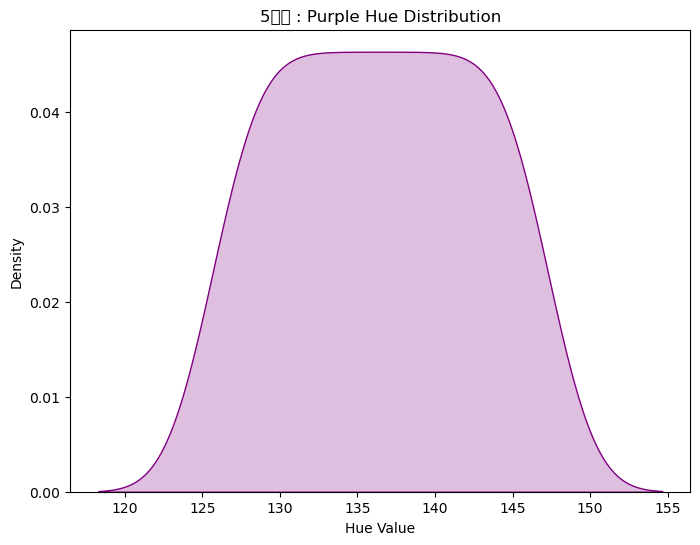

In [21]:
# 랜덤하게 20개의 이미지 선택
random_image_paths = random.sample(image_paths, 20)

# 공통 명도 범위 계산
common_brightness_range = calculate_common_brightness_range(random_image_paths)

# 공통 명도 범위를 보라색 hue 범위로 변환
purple_hue_range = brightness_to_purple_hue(common_brightness_range)

# 보라색 hue 분포 시각화
visualize_hue_distribution(purple_hue_range)

### 6. Model Simple Comparison

In [1]:

# Step 1: Determine optimal K using Elbow Method and Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k=10):
    distortions = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Elbow plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_k + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.show()

    # Silhouette score plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='purple')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Run the optimal clusters search on the training data
find_optimal_clusters(training_data, max_k=10)


NameError: name 'training_data' is not defined